In [1]:
library(ggplot2)
library(tidyverse)
library(ggsignif)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.3     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v lubridate 1.9.2     v tibble    3.2.1
v purrr     1.0.2     v tidyr     1.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [6]:
# load data 

data <- read.csv("TissueViewer data benchmark.csv")

# rename third column to mb
data <- data %>% rename(mb = `Data..MB.`)

# rename fourth column to time
data <- data %>% rename(time = `Time..sec.`)

data <- data %>%
  mutate(Tool = factor(Tool, levels = c("Client", "Pre-processed", "Server")))

In [8]:
data

Tool,Area,mb,time
<fct>,<int>,<dbl>,<dbl>
Server,1,3.3,2.40
Server,2,4.0,2.50
Server,3,2.9,2.78
Server,4,4.7,2.68
Server,5,3.3,2.36
Server,6,4.0,2.44
Server,7,2.0,3.22
Server,8,3.2,2.59
Server,9,2.7,1.95



	Welch Two Sample t-test

data:  server_data and client_data
t = -9.7349, df = 9.0151, p-value = 4.418e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -102.77523  -64.02477
sample estimates:
mean of x mean of y 
     3.41     86.81 



	Welch Two Sample t-test

data:  server_data and pre_data
t = -0.20239, df = 13.422, p-value = 0.8426
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.280415  1.060415
sample estimates:
mean of x mean of y 
     3.41      3.52 



	Welch Two Sample t-test

data:  client_data and pre_data
t = 9.7106, df = 9.0574, p-value = 4.359e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  63.9058 102.6742
sample estimates:
mean of x mean of y 
    86.81      3.52 


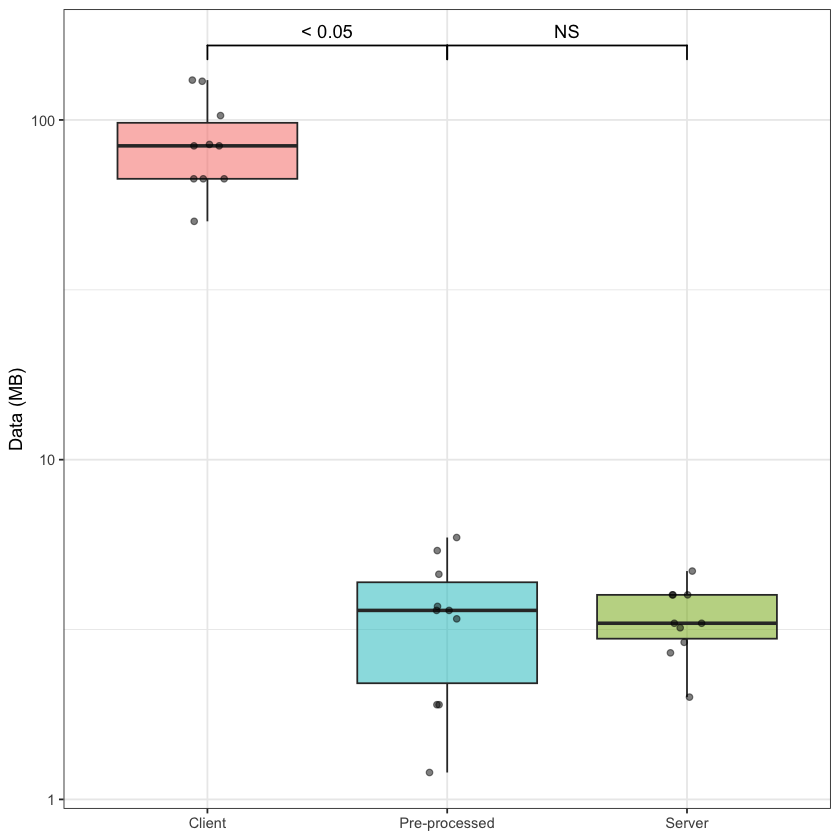

In [12]:
# statistical differences data

server_data <- data %>% filter(Tool == "Server") %>% pull(mb)
client_data <- data %>% filter(Tool == "Client") %>% pull(mb)
pre_data <- data %>% filter(Tool == "Pre-processed") %>% pull(mb)

t_test_client_server <- t.test(server_data, client_data)
t_test_server_pre <- t.test(server_data, pre_data)
t_test_pre_client <- t.test(client_data, pre_data)

t_test_client_server
t_test_server_pre
t_test_pre_client

p_server_pre <- ifelse(t_test_server_pre$p.value < 0.05, "< 0.05", "NS")
p_pre_client <- ifelse(t_test_pre_client$p.value < 0.05, "< 0.05", "NS")

# boxplot of MBs on logscale for data usage

data %>% ggplot(aes(x = Tool, y = mb, fill=Tool)) + 
  geom_boxplot(alpha=0.5) + 
  geom_point(alpha=0.5, position = position_jitterdodge()) +
  scale_y_log10() +
  scale_fill_manual(values = c("Client" = "#F8766D", "Pre-processed" = "#00BFC4", "Server" = "#7CAE00")) +
  labs(title = NULL, y = "Data (MB)", x = NULL) + 
  theme_bw() +
  theme(legend.position = "none") +
  geom_signif(comparisons = list(c("Server", "Pre-processed"), c("Pre-processed", "Client")),
            annotations = c(p_server_pre, p_pre_client),
            tip_length = 0.02)

  ggsave("data-usage.png", width = 5, height = 5)


	Welch Two Sample t-test

data:  server_data and client_data
t = -8.9141, df = 14.292, p-value = 3.24e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.400481 -2.083519
sample estimates:
mean of x mean of y 
    2.659     5.401 



	Welch Two Sample t-test

data:  server_data and pre_data
t = 9.3243, df = 9.01, p-value = 6.336e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.076311 1.765689
sample estimates:
mean of x mean of y 
    2.659     1.238 



	Welch Two Sample t-test

data:  client_data and pre_data
t = 15.577, df = 9.0032, p-value = 8.09e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 3.55848 4.76752
sample estimates:
mean of x mean of y 
    5.401     1.238 


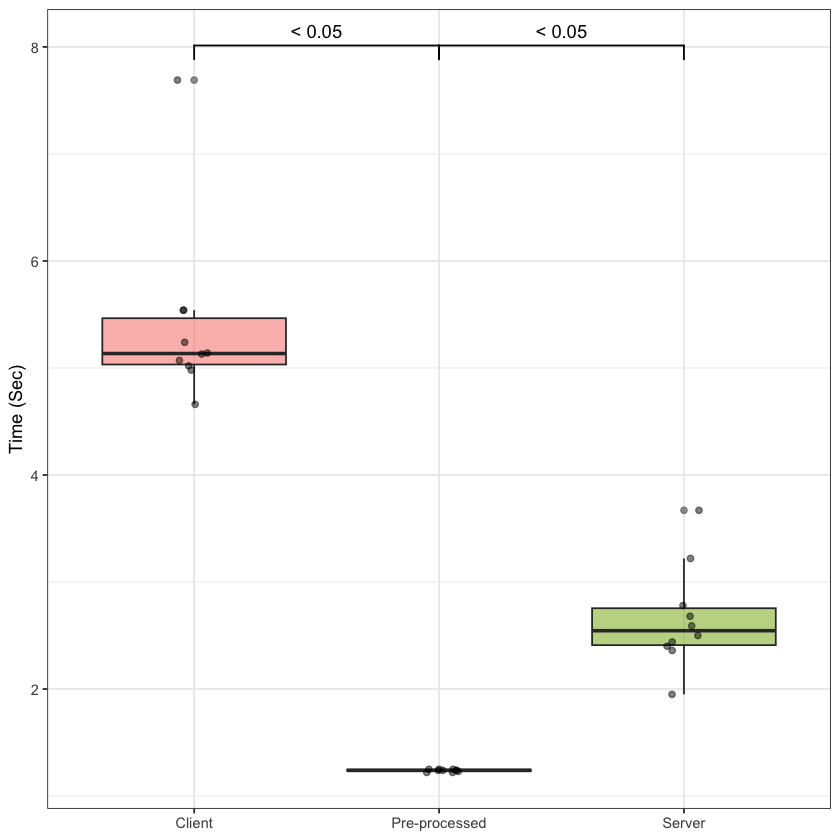

In [15]:
# statistical differences time

server_data <- data %>% filter(Tool == "Server") %>% pull(time)
client_data <- data %>% filter(Tool == "Client") %>% pull(time)
pre_data <- data %>% filter(Tool == "Pre-processed") %>% pull(time)

t_test_client_server <- t.test(server_data, client_data)
t_test_server_pre <- t.test(server_data, pre_data)
t_test_pre_client <- t.test(client_data, pre_data)

t_test_client_server
t_test_server_pre
t_test_pre_client

p_server_pre <- ifelse(t_test_server_pre$p.value < 0.05, "< 0.05", "NS")
p_pre_client <- ifelse(t_test_pre_client$p.value < 0.05, "< 0.05", "NS")

# boxplot of MBs on logscale for data usage

data %>% ggplot(aes(x = Tool, y = time, fill=Tool)) + 
  geom_boxplot(alpha=0.5) + 
  geom_point(alpha=0.5, position = position_jitterdodge()) +
  scale_fill_manual(values = c("Client" = "#F8766D", "Pre-processed" = "#00BFC4", "Server" = "#7CAE00")) +
  labs(title = NULL, y = "Time (Sec)", x = NULL) + 
  theme_bw() +
  theme(legend.position = "none") +
  geom_signif(comparisons = list(c("Server", "Pre-processed"), c("Pre-processed", "Client")),
            annotations = c(p_server_pre, p_pre_client),
            tip_length = 0.02)

  ggsave("time-taken.png", width = 5, height = 5)